# 11 Pandas Explode

When we have a list of data within a cell of a row, we need to modify to be able to do analysis of the individuals components across the entire dataset. We need to "explode" the list across multiple rows, one rows per list item in each cell.

In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\erard\Anaconda3\envs\Luke_Barousse_Python_Course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Simple example

In [3]:
# creating a simple dataframe

data = {
    'job_title_short': ['Data Analyst', 'Data Scientist', 'Data Engineer'],
    'job_skills': [['excel', 'sql', 'python'], ['python', 'r'], ['aws', 'python', 'airflow']]
}

df_skills = pd.DataFrame(data)

df_skills

,job_title_short,job_skills
0,Data Analyst,"[excel, sql, python]"
1,Data Scientist,"[python, r]"
2,Data Engineer,"[aws, python, airflow]"


In [4]:
df_exploded = df_skills.explode('job_skills')

df_exploded

,job_title_short,job_skills
0,Data Analyst,excel
0,Data Analyst,sql
0,Data Analyst,python
1,Data Scientist,python
1,Data Scientist,r
2,Data Engineer,aws
2,Data Engineer,python
2,Data Engineer,airflow


## Example with the actual dataset

In [5]:
# the extra line of code in the import is from the functions section where we cleaned the job_skills column and changed its type from str to list

df[["job_title_short", "job_skills"]].head()

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [6]:
# let's look at the explode method

help(df.explode)

Help on method explode in module pandas.core.frame:

explode(column: 'IndexLabel', ignore_index: 'bool' = False) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Transform each element of a list-like to a row, replicating index values.
    
    Parameters
    ----------
    column : IndexLabel
        Column(s) to explode.
        For multiple columns, specify a non-empty list with each element
        be str or tuple, and all specified columns their list-like data
        on same row of the frame must have matching length.
    
        .. versionadded:: 1.3.0
            Multi-column explode
    
    ignore_index : bool, default False
        If True, the resulting index will be labeled 0, 1, …, n - 1.
    
    Returns
    -------
    DataFrame
        Exploded lists to rows of the subset columns;
        index will be duplicated for these rows.
    
    Raises
    ------
    ValueError :
        * If columns of the frame are not unique.
        * If specified columns

In [7]:
df_exploded = df.explode("job_skills")

df_exploded

# the df is now exploded in individual rows for each skill

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kafka,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kubernetes,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,docker,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785740,Software Engineer,AWS System Analyst,India,melalui Trigyn,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Trigyn,aws,"{'cloud': ['aws'], 'other': ['flow']}"


<Axes: xlabel='job_skills'>

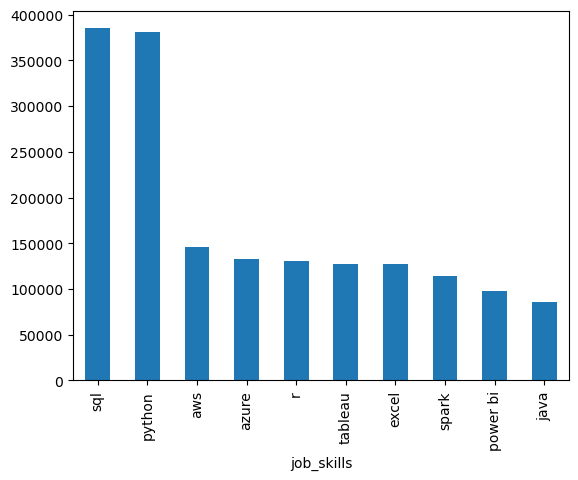

In [8]:
# we can now explore more in details the skills

df_exploded["job_skills"].value_counts().head(10).plot(kind="bar")

In [9]:
# let's also add a dimension of job_title to further precise the analysis

skills_count = df_exploded.groupby(["job_skills","job_title_short"]).size()

# but the above's result is a series. Dataframe are better to work with for plotting. Let's transform it

df_skills_count = skills_count.reset_index(name="skill_count")

df_skills_count = df_skills_count.sort_values(by="skill_count", ascending=False)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


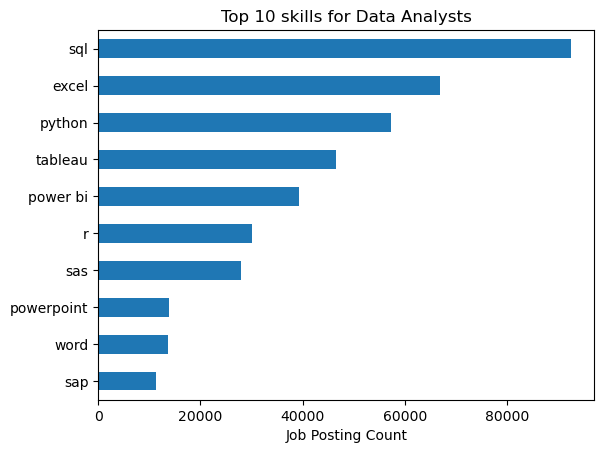

In [10]:
# we have what we need to plot the skills per job title now

job_title = "Data Analyst"
top_skils = 10

df_skills_final = df_skills_count[df_skills_count["job_title_short"] == job_title].head(top_skils)

df_skills_final.plot(kind="barh", x="job_skills", y="skill_count")
plt.gca().invert_yaxis()
plt.title(f"Top {top_skils} skills for {job_title}s")
plt.xlabel("Job Posting Count")
plt.ylabel("")
plt.legend().set_visible(False)
plt.show()

# 11 Problems

## 2.11.1

- Using the ast library, clean up the job_skills column to be of the list data type in preparation for exploding this column.
    - NOTE: For future problems, it'll be assumed that you have done this step in preparation for exploding this column.
- Explode the job_skills column in the DataFrame and create a bar plot using pandas of the top 10 most common skills for Cloud Engineer.
- Add labels for the x-axis (label as 'Skills'), y-axis (label as 'Count') and a title (set as 'Top 10 Most Common Skills for Cloud Engineers') for the plot.

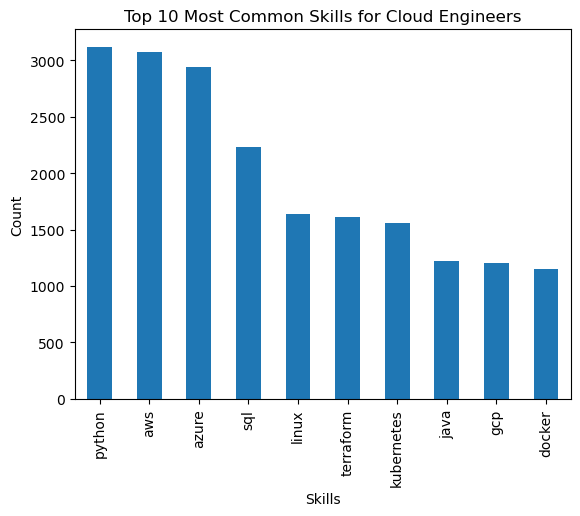

In [ ]:
# create a new df for this example

df_problem1 = df.copy()

# Filter only for Cloud Engineer jobs + explode + only keep the top 10

df_problem1_CE = df_problem1[df_problem1["job_title_short"] == "Cloud Engineer"]
df_problem1_CE_exploded = df_problem1_CE.explode("job_skills")
skill_counts_CE = df_problem1_CE_exploded["job_skills"].value_counts().head(10)

# plot

skill_counts_CE.plot(kind="bar")
plt.xlabel("Skills")
plt.ylabel("Count")
plt.legend().set_visible(False)
plt.title("Top 10 Most Common Skills for Cloud Engineers")
plt.show()


## 2.11.2

Explode the job_skills column in the DataFrame and calculate the average salary for each skill. Display the top 5 skills with the highest average salary.

In [36]:
# new df for problem

df_problem2 = df.copy()

# explode the job column, filter for rows with salary info  

df_problem2_exploded = df_problem2.explode("job_skills")

df_problem2_exploded_salary = df_problem2_exploded.dropna(subset=['salary_year_avg'])

# group by skill, calculate mean and sort top 5 descending

average_salary_by_skill = df_problem2_exploded_salary.groupby("job_skills")["salary_year_avg"].mean().reset_index()

average_salary_by_skill = average_salary_by_skill.sort_values(by="salary_year_avg", ascending=False).head()

average_salary_by_skill

,job_skills,salary_year_avg
44,debian,196500.000000
153,ringcentral,182500.000000
100,lua,170500.000000
109,mongo,169526.929749
49,dplyr,160667.210526


## 2.11.3

Explode the job_skills column in the DataFrame and calculate the number of unique skills for each job posting. Display the first 5 rows of the resulting DataFrame with a new column num_unique_skills.

In [ ]:
# copy of df

df_problem3 = df.copy()

# explode the df

df_problem3_exploded = df_problem3.explode("job_skills")

# group by job_title

unique_skill_count_per_job = df_problem3_exploded.groupby("job_title")["job_skills"].nunique().reset_index()
unique_skill_count_per_job.columns = ["job_title", "num_unique_skills"]
unique_skill_count_per_job.head()

,job_title,job_skills
0,!! Data Engineer [W2] | FULLY REMOTE | Immedia...,10
1,!!urgent Hiring!! AWS Lead data engineer(Hybri...,13
2,!URGENT HIRING! Data Analyst (hybrid setup),3
3,!เจ้าหน้าที่วิศวกรรมข้อมูล (MIS & Analytics),4
4,"""\tHead Of Analytics""",2
...,...,...
234668,🧑‍🔬 R&D Engineer,6
234669,🧱 Project Lead,4
234670,🧱 Senior Data Engineer,0
234671,🩺 BI Data Engineer - Medtech - H/F,4
